In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
a = os.getcwd()
a

'C:\\Users\\User\\BANGKIT_GOOGLE\\Project 1'

## SPLIT AND SAVING DATASET

In [3]:
df = pd.read_csv((a+'\\autos.csv'),encoding='ISO-8859–1')

In [4]:
df.info()                           #General summary of dataset
#Shown below numerical and categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [5]:
df['vehicleType'].value_counts()        #Amount of types

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [6]:
df_suv = df[df['vehicleType']=='suv']    #Slice for SUV Type
df_suv['vehicleType'].value_counts()     #Confirm the slicing

suv    14707
Name: vehicleType, dtype: int64

In [8]:
test_size = 0.2     #Percentage of dataset in decimal
seed = 1            #Generation series code
train = df.sample(frac=(1-test_size),random_state=seed)       #Random picking
test = df.drop(train.index)                                #Slicing out of train set
print('Jumlah dataset training dan test : {} , {}'.format(train.shape[0],test.shape[0]))

Jumlah dataset training dan test : 297222 , 74306


In [56]:
#SAVE NON_ENCODED DATASET INTO CSV
train.to_csv((a+'\\train_raw.csv'),index=False)
test.to_csv((a+'\\test_raw.csv'),index=False)

## DATA PREPROCESSING

In [9]:
df_suv.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,17999,control,suv,2011,manuell,190,navara,70000,3,diesel,nissan,nein,2016-03-21 00:00:00,0,4177,2016-04-06 07:45:42
60,2016-03-29 15:48:15,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,privat,Angebot,1,control,suv,1994,manuell,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,0,53721,2016-04-06 01:44:38
68,2016-03-21 12:47:55,Honda_HRV_reserviert!!!,privat,Angebot,2100,control,suv,2000,manuell,105,andere,150000,8,benzin,honda,nein,2016-02-09 00:00:00,0,85244,2016-03-31 16:46:09
87,2016-03-29 14:58:15,Volvo_XC90_AWD_D5_Kinetic_Leder_Standheizung_A...,privat,Angebot,8000,test,suv,2005,manuell,185,xc_reihe,150000,8,diesel,volvo,NaN,2016-03-29 00:00:00,0,96472,2016-04-03 23:18:17


In [10]:
df_suv.describe().T

,count,mean,std,min,25%,50%,75%,max
price,14707.0,13242.822397,16268.792405,0.0,5200.0,10500.0,17400.0,1000000.0
yearOfRegistration,14707.0,2005.427755,7.796612,1910.0,2003.0,2007.0,2010.0,2017.0
powerPS,14707.0,166.006392,166.473056,0.0,125.0,155.0,204.0,17322.0
kilometer,14707.0,112836.404433,46107.386516,5000.0,80000.0,150000.0,150000.0,150000.0
monthOfRegistration,14707.0,6.235058,3.583516,0.0,3.0,6.0,9.0,12.0
nrOfPictures,14707.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
postalCode,14707.0,52416.091929,25909.650807,1067.0,31591.0,52249.0,73329.0,99998.0


 As we look above, there are some abnormal maximum values that could be consider as outliers.
 Few options to handle that, but the simplest one is remove them away.

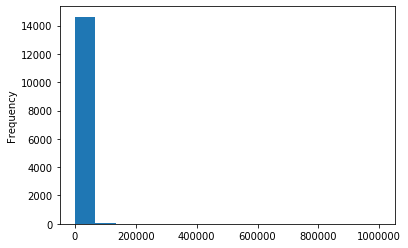

In [11]:
df_suv['price'].plot.hist(bins=15)   #Outliers shown with tremendous high price value which reaches 9 digits
                                                    #Histogram could not visualizes proper representative pattern
# Should remove the outlier to prevent model failure for learning the pattern

In [12]:
# SPLIT DATASET INTO CATEGORICAL AND NUMERICAL FEATURES
df_cat = pd.DataFrame()
df_num = pd.DataFrame()
for col in df.columns:
    if df_suv[col].dtype == 'O':
        df_cat[col] = df_suv[col]
    elif df_suv[col].dtype == 'int64':
        df_num[col] = df_suv[col]

In [13]:
df_num.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
2,9800,2004,163,125000,8,0,90480
14,17999,2011,190,70000,3,0,4177
60,1,1994,286,150000,11,0,53721
68,2100,2000,105,150000,8,0,85244
87,8000,2005,185,150000,8,0,96472


In [14]:
df_cat.head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,test,suv,automatik,grand,diesel,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,control,suv,manuell,navara,diesel,nissan,nein,2016-03-21 00:00:00,2016-04-06 07:45:42
60,2016-03-29 15:48:15,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,privat,Angebot,control,suv,manuell,NaN,NaN,sonstige_autos,NaN,2016-03-29 00:00:00,2016-04-06 01:44:38
68,2016-03-21 12:47:55,Honda_HRV_reserviert!!!,privat,Angebot,control,suv,manuell,andere,benzin,honda,nein,2016-02-09 00:00:00,2016-03-31 16:46:09
87,2016-03-29 14:58:15,Volvo_XC90_AWD_D5_Kinetic_Leder_Standheizung_A...,privat,Angebot,test,suv,manuell,xc_reihe,diesel,volvo,NaN,2016-03-29 00:00:00,2016-04-03 23:18:17


In [15]:
df_cat.isnull().sum()                  #Null Data

dateCrawled             0
name                    0
seller                  0
offerType               0
abtest                  0
vehicleType             0
gearbox               348
model                 858
fuelType              443
brand                   0
notRepairedDamage    1578
dateCreated             0
lastSeen                0
dtype: int64

In [16]:
# Drop data columns with null data 
df_cat = df_cat.drop(['gearbox','model','fuelType','notRepairedDamage'],axis=1)     #Removing columns with Null Data
df_cat.head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,brand,dateCreated,lastSeen
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,test,suv,jeep,2016-03-14 00:00:00,2016-04-05 12:47:46
14,2016-03-21 12:57:01,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,privat,Angebot,control,suv,nissan,2016-03-21 00:00:00,2016-04-06 07:45:42
60,2016-03-29 15:48:15,TAUSCHE_BMW_E38_740i_g._SUV_/_GELÄNDEWAGEN_LES...,privat,Angebot,control,suv,sonstige_autos,2016-03-29 00:00:00,2016-04-06 01:44:38
68,2016-03-21 12:47:55,Honda_HRV_reserviert!!!,privat,Angebot,control,suv,honda,2016-02-09 00:00:00,2016-03-31 16:46:09
87,2016-03-29 14:58:15,Volvo_XC90_AWD_D5_Kinetic_Leder_Standheizung_A...,privat,Angebot,test,suv,volvo,2016-03-29 00:00:00,2016-04-03 23:18:17


In [17]:
df_cat = df_cat.drop(['dateCrawled','name','vehicleType','dateCreated','lastSeen'],axis=1) 
#Removing data columns with less important features

In [18]:
df_cat.head()

,seller,offerType,abtest,brand
2,privat,Angebot,test,jeep
14,privat,Angebot,control,nissan
60,privat,Angebot,control,sonstige_autos
68,privat,Angebot,control,honda
87,privat,Angebot,test,volvo


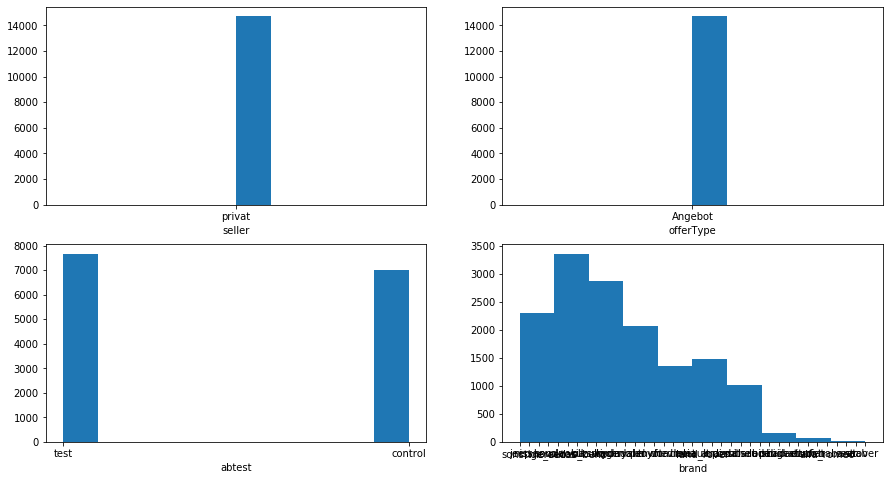

In [19]:
# Labeled Categorical Features
rows = 2;columns = 2;
fig,ax = plt.subplots(nrows=rows,ncols=columns,figsize=(15,8))
p = 0;
for i in range(rows):
    for j in range(columns):
        #if i==rows-1 and j==columns-1:
            #fig.delaxes(ax[i,j])
            #break
        ax[i,j].hist(df_cat[df_cat.columns[p]])
        ax[i,j].set_xlabel(df_cat.columns[p])
        p+=1
# Look diagram below, 'seller' and 'offerType' are single label with constant... 
# fashion so it could not be categorical features.

In [20]:
#REMOVING SINGLE FASHION FEATURES PLOT
df_cat = df_cat.drop(['seller','offerType'],axis=1)
df_cat.head()

,abtest,brand
2,test,jeep
14,control,nissan
60,control,sonstige_autos
68,control,honda
87,test,volvo


In [21]:
df_cat_encode = pd.get_dummies(df_cat)      #one-hot encoding in categorical features dataset
df_cat_encode.head()

,abtest_control,abtest_test,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,...,brand_saab,brand_seat,brand_skoda,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
68,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


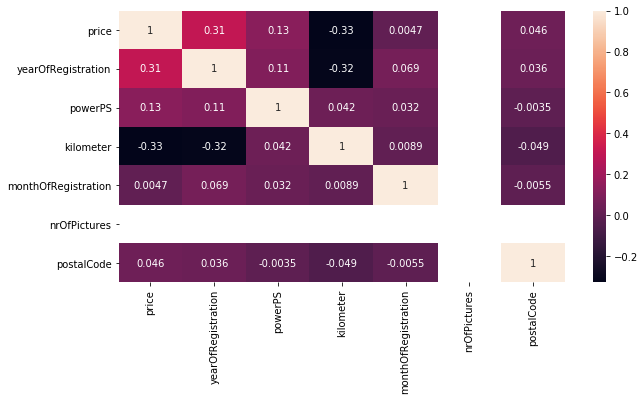

In [22]:
# Heatmap of numerical features
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True)

Positive Correlation relative to 'price' in features : powerPS, yearOfRegistration,monthOfRegistration,and postalCode
but there is null-value : nrOfPictures

In [23]:
df_num = df_num.drop(['nrOfPictures','postalCode'],axis=1)    #Removing less important columns to make numerical data

In [24]:
df_num.head()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
2,9800,2004,163,125000,8
14,17999,2011,190,70000,3
60,1,1994,286,150000,11
68,2100,2000,105,150000,8
87,8000,2005,185,150000,8


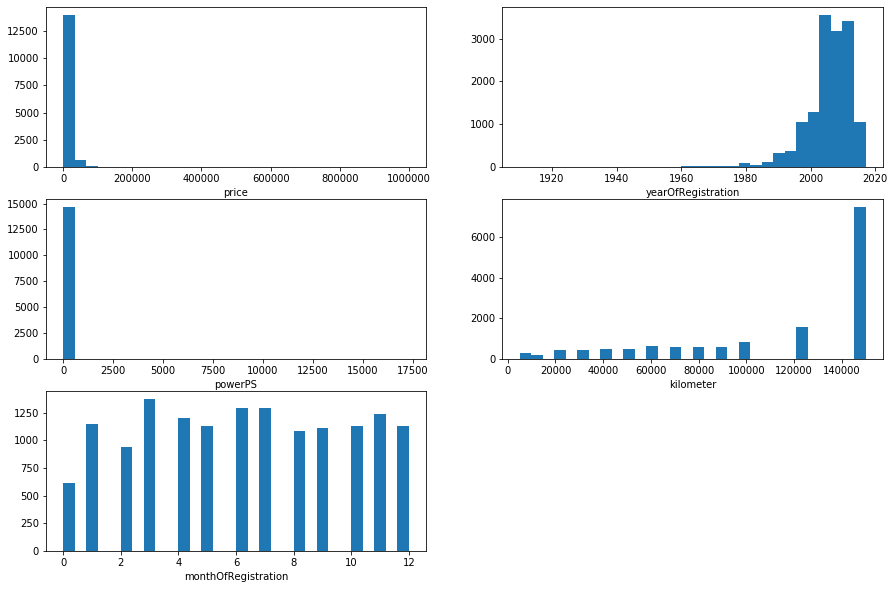

In [28]:
# Numerical Features Pattern Quick-Look 
rows = 3;columns = 2;
fig,ax = plt.subplots(nrows=rows,ncols=columns,figsize=(15,10))
p = 0;
for i in range(rows):
    for j in range(columns):
        if i==rows-1 and j==columns-1:
            fig.delaxes(ax[i,j])
            break
        ax[i,j].hist(df_num[df_num.columns[p]],bins=30)
        ax[i,j].set_xlabel(df_num.columns[p])
        p+=1
# Mostly they are negative skew-distribution but one of data ['powerPS'] doesn't visualize properly.

In [29]:
#CONCATENATION OF CATEGORICAL AND NUMERICAL DATA
data_prep = pd.concat([df_cat,df_num],axis=1)                     #Concatenate horizontally (Not one-encoding)
data_prep_encode = pd.concat([df_cat_encode,df_num],axis=1)       #Concatenate horizontally (One-hot encoding version)

In [30]:
## Saving data_preprocessing into CSV (ONLT RUN WHEN NEED FULL-PREPROCESSING DATA)
data_prep.to_csv(a+'\\data_prep.csv',index=False)
data_prep_encode.to_csv(a+'\\data_prep_encode.csv',index=False)

In [31]:
# SPLITING TRAIN AND TEST DATA
test_size = 0.2     #Percentage of dataset in decimal
seed = 2            #Generation series code
train_prep = data_prep.sample(frac=(1-test_size),random_state=seed)               #Random picking for non-encoding data
train_prep_encode = data_prep_encode.sample(frac=(1-test_size),random_state=seed) #Random picking for encoding data
test_prep = data_prep.drop(train_prep.index)                                      #Slicing out of train_prep set
test_prep_encode = data_prep_encode.drop(train_prep_encode.index)                 #Slicing out of train_prep_encode set
print('Jumlah dataset training dan test (by rows,Preprocessing) : {} , {}'.format(train_prep.shape[0],test_prep.shape[0]))

Jumlah dataset training dan test (by rows,Preprocessing) : 11766 , 2941


In [32]:
## Saving splitting data_preprocessing into CSV (ONLT RUN WHEN NEED TEST AND TREAIN DATA AFTER PREPROCESSING)
train_prep.to_csv((a+'\\train_prep.csv'),index=False)
train_prep_encode.to_csv((a+'\\train_prep_encode.csv'),index=False)
test_prep.to_csv((a+'\\test_prep.csv'),index=False)
test_prep_encode.to_csv((a+'\\test_prep_encode.csv'),index=False)

In [33]:
train_prep.head()

,abtest,brand,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
357059,control,volkswagen,19900,2014,110,50000,4
286759,test,hyundai,18900,2014,135,30000,1
191011,test,jeep,7500,2008,170,90000,1
256654,control,bmw,17500,2007,235,150000,11
243400,control,porsche,48800,2011,400,100000,7


In [34]:
train_prep_encode.head()

,abtest_control,abtest_test,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,...,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
357059,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,19900,2014,110,50000,4
286759,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,18900,2014,135,30000,1
191011,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7500,2008,170,90000,1
256654,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,17500,2007,235,150000,11
243400,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,48800,2011,400,100000,7


In [35]:
test_prep.head()

,abtest,brand,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
14,control,nissan,17999,2011,190,70000,3
390,test,mercedes_benz,21500,2007,510,150000,4
435,control,suzuki,1199,1992,80,150000,5
571,test,hyundai,4800,2004,145,150000,11
690,test,sonstige_autos,9900,2000,250,150000,4


In [36]:
test_prep_encode.head()

,abtest_control,abtest_test,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,...,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17999,2011,190,70000,3
390,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,21500,2007,510,150000,4
435,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1199,1992,80,150000,5
571,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4800,2004,145,150000,11
690,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9900,2000,250,150000,4


In [37]:
data_prep.head()

,abtest,brand,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
2,test,jeep,9800,2004,163,125000,8
14,control,nissan,17999,2011,190,70000,3
60,control,sonstige_autos,1,1994,286,150000,11
68,control,honda,2100,2000,105,150000,8
87,test,volvo,8000,2005,185,150000,8


In [38]:
data_prep_encode.head()

,abtest_control,abtest_test,brand_alfa_romeo,brand_audi,brand_bmw,brand_chevrolet,brand_chrysler,brand_citroen,brand_dacia,brand_daewoo,...,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9800,2004,163,125000,8
14,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17999,2011,190,70000,3
60,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1994,286,150000,11
68,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2100,2000,105,150000,8
87,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8000,2005,185,150000,8
